[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4 ]
[0.         0.20033484 0.28379411 0.34816602 0.40271584 0.45102681
 0.49493413 0.53552665 0.5735131  0.60938531 0.64350111 0.67613051
 0.70748321 0.73772597 0.76699401 0.79539883 0.82303369 0.84997757
 0.87629806 0.90205362 0.92729522 0.95206764 0.97641053 1.00035922
 1.02394538 1.04719755 1.07014161 1.09280113 1.11519765 1.13735101
 1.15927948]


,beta,alpha
1,0.456682,0.716272
3,6.011837,1.028903
5,4.939282,0.552584
6,3.228859,0.017520
7,0.226893,0.885419
...,...,...
6538,0.218578,0.953885
6539,3.219099,0.734534
6540,3.099179,1.309222
6541,0.593412,0.717247


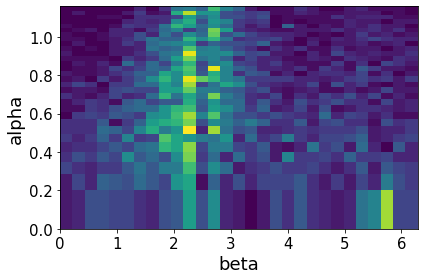

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

pi = np.pi

# Bin edges
binEdges_beta = np.linspace(0, 2*np.pi,30)

binEdges_alpha = np.linspace(0.4, 1, 31)
binEdges_alpha = binEdges_alpha[::-1]
binEdges_alpha = np.arccos(binEdges_alpha)

print(binEdges_alpha)
print(np.arccos(binEdges_alpha))

binEdges_alpha = [0.        , 0.20033484, 0.28379411, 0.34816602, 0.40271584, 0.45102681,
                  0.49493413, 0.53552665, 0.5735131 , 0.60938531, 0.64350111, 0.67613051,
                  0.70748321, 0.73772597, 0.76699401, 0.79539883, 0.82303369, 0.84997757,
                  0.87629806, 0.90205362, 0.92729522, 0.95206764, 0.97641053, 1.00035922,
                  1.02394538, 1.04719755, 1.07014161, 1.09280113, 1.11519765, 1.13735101,
                  1.15927948]






data   = pd.read_hdf("MeasuredMuonsFromData.h5") # Read in data

display(data)

# Add 220deg to beta
data["beta"] = data["beta"] + pi*(220)/180 

# Account for rotational symmetry
data.loc[data.beta>pi*2, "beta"] = data["beta"] - pi*2
data.loc[data.beta<0, "beta"] = data["beta"] + pi*2

# Reverse direction of beta to opposite direction
data["beta"] = -1*(data["beta"] - pi*2)

hist_data= plt.hist2d(data["beta"], data["alpha"], bins=[binEdges_beta, binEdges_alpha]) 
plt.xlabel("beta", fontsize=18)
plt.ylabel("alpha", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()


In [7]:
print(np.pi/2)

1.5707963267948966


In [3]:
# data   = pd.read_hdf("MCFluxOutputs.h5")

# display(data)

# data["beta"] = data["beta"] + pi*(220)/180
# data.loc[data.beta>pi*2, "beta"] = data["beta"] - pi*2
# data.loc[data.beta<0, "beta"] = data["beta"] + pi*2
# data["beta"] = -1*(data["beta"] - pi*2)

# hist_data= plt.hist2d(data["beta"], data["alpha"],weights=data["SimWeightAvg"], bins=50) 
# plt.xlabel("beta", fontsize=18)
# plt.ylabel("alpha", fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15) 
# plt.tight_layout()
# plt.show()


In [4]:
# print(hist_data[0])
# print(hist_data[1]) # rows
# print(hist_data[2]) # columns

rows = []
columns = []

# Get the Bin Centers to loop over
for indx in range(0, len(hist_data[1])-1):
    rows.append( (hist_data[1][indx+1] - hist_data[1][indx])/2.0 + hist_data[1][indx])
    # print(rows[indx])

for indx in range(0, len(hist_data[2])-1):
    columns.append( (hist_data[2][indx+1] - hist_data[2][indx])/2.0 + hist_data[2][indx])
    # print(columns[indx])

# Loop over the histogram bins and create three arrays 
# print(len(hist_data[0][:]), len(rows), len(columns))


intensity = []
beta      = []
alpha     = []

for y in range(0, len(hist_data[0])):
    for x in range(0, len(hist_data[0][y])):
        # print(hist_data[0][y][x], rows[y], columns[x])
        intensity.append(hist_data[0][y][x])
        beta.append(rows[y])
        alpha.append(columns[x])
    
    # print(" ")

dict_ = {'Intenisty':intensity, 'beta': beta, 'alpha': alpha}

dataframe = pd.DataFrame(dict_)
display(dataframe)

,Intenisty,beta,alpha
0,2.0,0.108331,0.100167
1,2.0,0.108331,0.242064
2,6.0,0.108331,0.315980
3,4.0,0.108331,0.375441
4,3.0,0.108331,0.426871
...,...,...,...
865,0.0,6.174855,1.058670
866,2.0,6.174855,1.081471
867,1.0,6.174855,1.103999
868,0.0,6.174855,1.126274


In [5]:
# Write the data from hdf5 format to csv for reading into nexus
filepath = Path('MeasuredMuonsFromData.csv')  
dataframe.to_csv(filepath, index = False, header = False)  